## ReCell Project
### Kothai Niveda M

## Context 
    
Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

## Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.


## Data Description

The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the phone runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the phone battery in mAh
- weight: Weight of the phone in grams
- release_year: Year when the phone model was released
- days_used: Number of days the used/refurbished phone has been used
- new_price: Price of a new phone of the same model in euros
- used_price: Price of the used/refurbished phone in euros

## Importing necessary libraries and data

In [179]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [180]:
# loading the dataset
data = pd.read_csv("used_phone_data.csv")

## Data Overview

- Observations
- Sanity checks

In [181]:
# returns the first 5 rows
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [182]:
# check number of rows and columns
data.shape

(3571, 15)

#### Observations:
- The dataset has 3571 rows and 15 columns.

In [183]:
# take a look at the column names
data.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [184]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


#### Observations

- There are 3571 rows and 15 columns.
- brand_name, os, 4g and 5g are objects and all other variables are numerical type.
- Dependent variable is used_price.
- There are missing values in main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight.

In [185]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


#### Observations

- brand_name has 34 unique values, os has 4 unique values and 4g and 5g have two unique values - yes or no. 
- used_price ranges from about $ 2.51 to $ 1916.54 and the mean is about 109.88 Euros

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

### Univariate Analysis

In [186]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
    plt.show()  # show the plot

In [187]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### brand_name

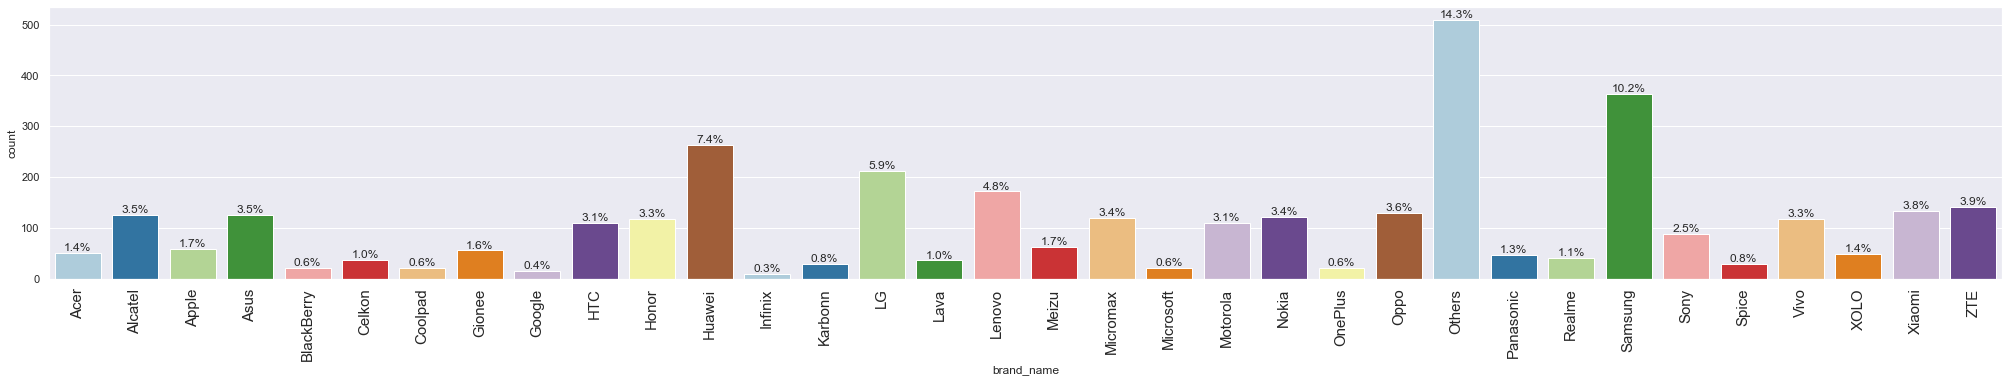

In [188]:
labeled_barplot(data, "brand_name", perc=True)

#### Observations
- 10.2% of the phones are of Samsung brand, which is the highest percentage.
- This is followed by Huawei (7.4%), LG (5.9%) AND Lenovo (4.8%).

#### os

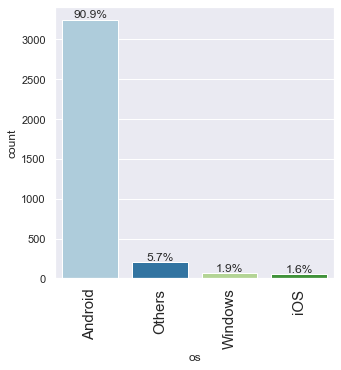

In [189]:
labeled_barplot(data, "os", perc=True)

#### Observations
- Most phone runs on Android (90.9%) followed by Others (5.7%), Windows (1.9%) and iOS (1.6%)
- Question 2 - What percentage of the used phone market is dominated by Android devices? - 90.9%

#### screen_size

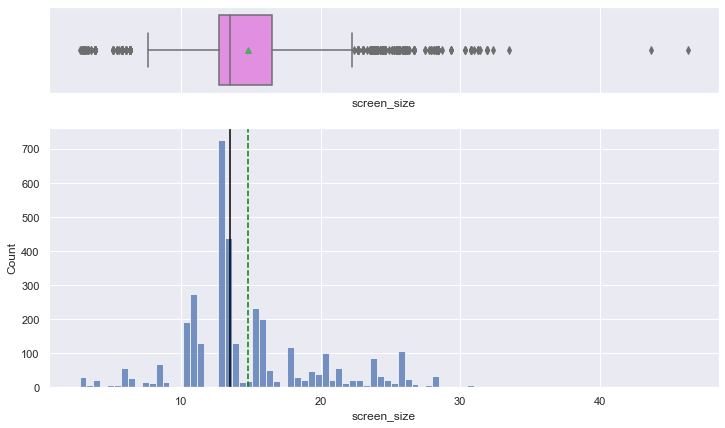

In [190]:
histogram_boxplot(data, "screen_size")

#### Observations
- The distribution is right skewed.
- The mean screen_size is roughly around 15cm.
- They are 2 extreme outliers where the screen size of the phone is greater than 40cm.

In [191]:
# Finding the percentage of phones across different brands with a screen size larger than 6 inches (15.24cm)
len(data[data['screen_size'] > 15.24])/len(data)*100

34.58415009801176

- Question 5 - Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches (15.24cm)? - 34.58% of the phones are available.

#### 4g

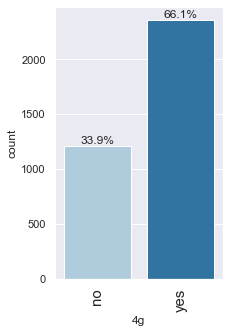

In [192]:
labeled_barplot(data, "4g", perc=True)

#### Observations:
- 66.1% of the phones have 4g available.

#### 5g

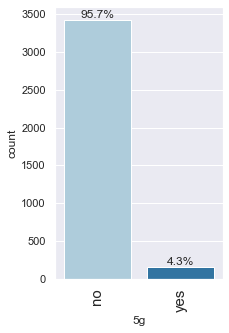

In [193]:
labeled_barplot(data, "5g", perc=True)

#### Observations:
- Majority of the phones (95.7%) do not have 5g available.

#### main_camera_mp

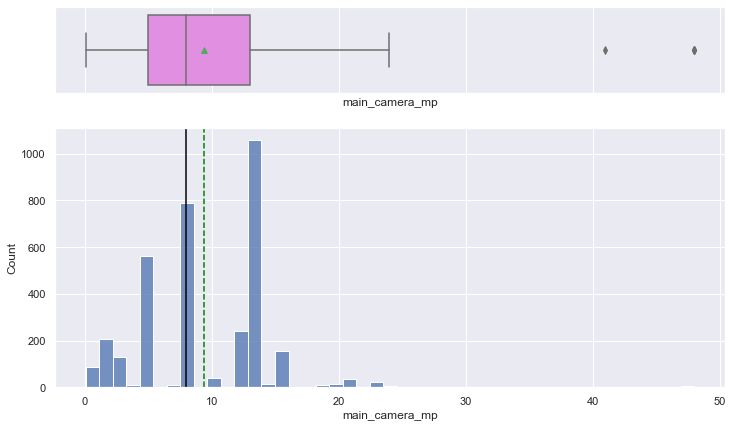

In [194]:
histogram_boxplot(data, "main_camera_mp")

#### Observations:
- The distribution is right skewed.
- The mean main_camera_mp is about 9 megapixels. 
- There are 2 outliers where the main camera megapixel is greater than 40 mp. 

#### selfie_camera_mp

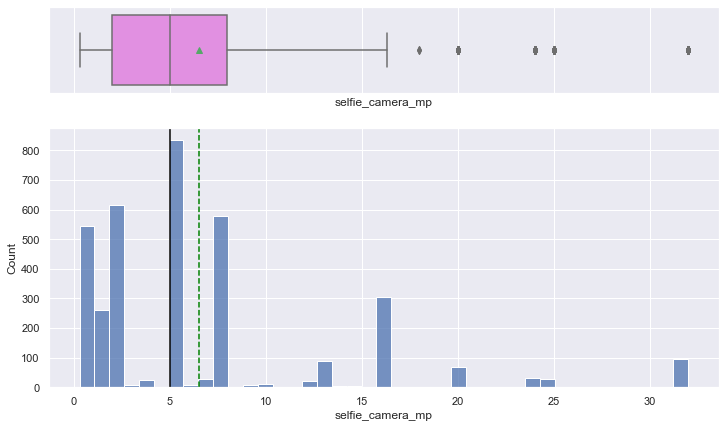

In [195]:
histogram_boxplot(data, "selfie_camera_mp")

#### Observations:
- The distribution is right skewed.
- The mean selfie_camera_mp is about 6.5 megapixels. 
- There are 5 outliers where the selfie camera megapixel of the phone is greater than 15 mp.

#### int_memory

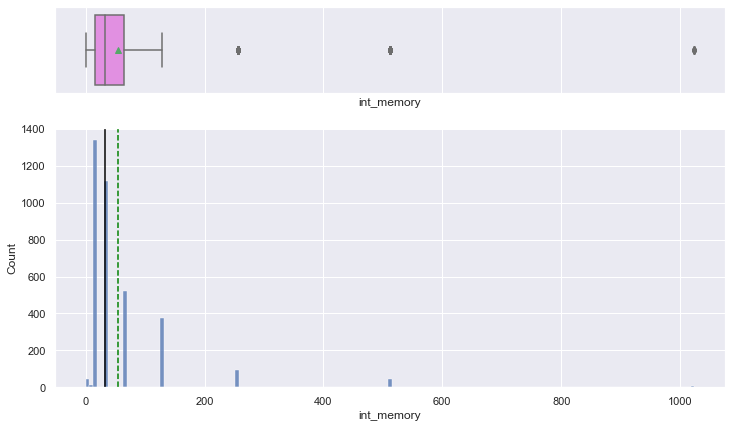

In [196]:
histogram_boxplot(data, "int_memory")

#### Observations:
- The distribution is right skewed.
- The mean int_memory is about 50 GB. 
- There are 3 outliers. 

#### ram

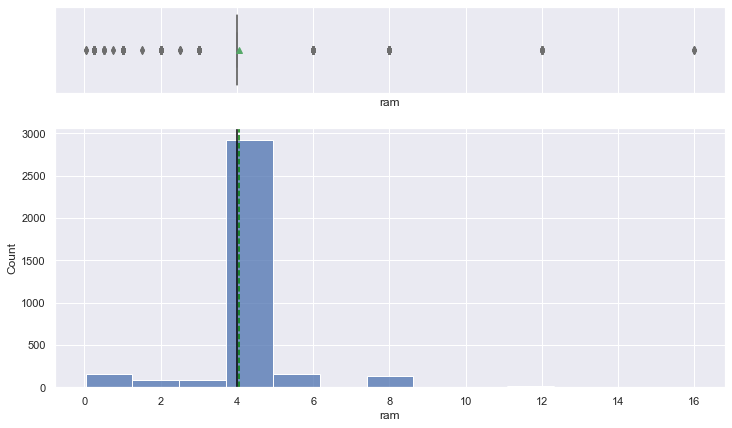

In [197]:
histogram_boxplot(data, "ram")

#### Observations:
- The distribution is right skewed.
- The mean, 25th percentile, 50th percentile and 75th percentile ram values are all around 4 GB. 
- There are a few outliers. 

#### battery

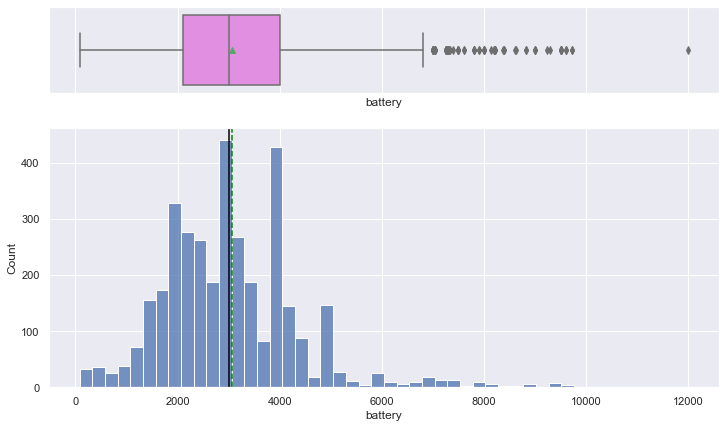

In [198]:
histogram_boxplot(data, "battery")

#### Observations:
- The distribution is right skewed.
- The mean and median energy capacity of the battery is around 3000 mAh.
- There is 1 extreme outlier with a battery energy capacity of 12000 mAh

#### weight

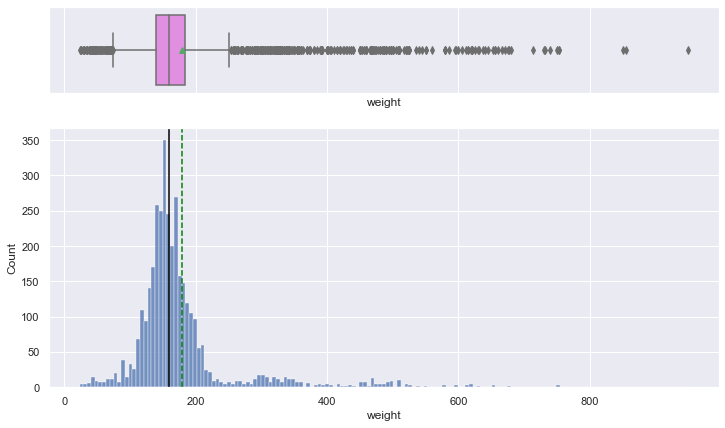

In [199]:
histogram_boxplot(data, "weight")

#### Observations:
- The distribution is right skewed.
- The mean weight is around 180 grams.
- There are a few extreme outliers where the weight is more than 800grams.

#### release_year

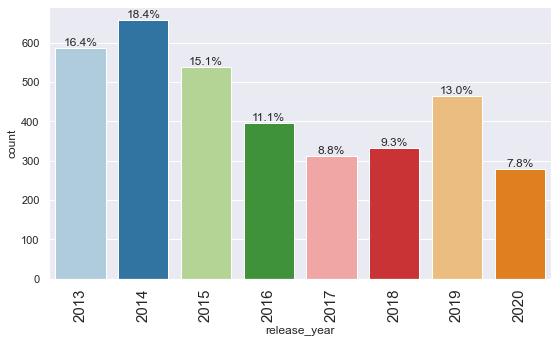

In [200]:
labeled_barplot(data, "release_year", perc=True)

#### Observations:
- Majority of the phones were released in 2014 (18.4%)

#### days_used

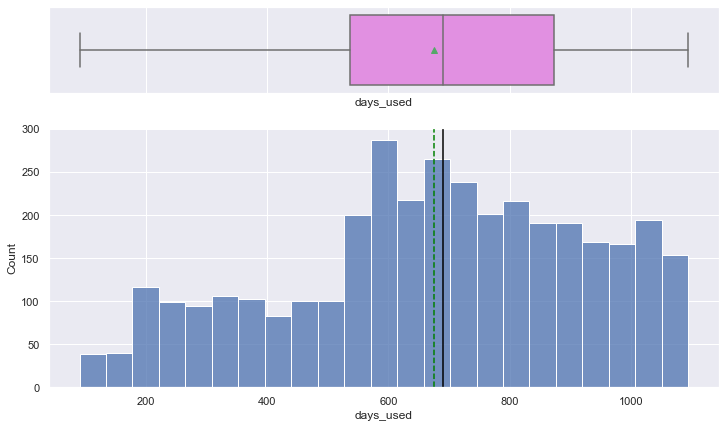

In [201]:
histogram_boxplot(data, "days_used")

#### Observations:
- The distribution is left-skewed.
- The mean number of days_used is about 700 days.
- There are no outliers.

#### new_price

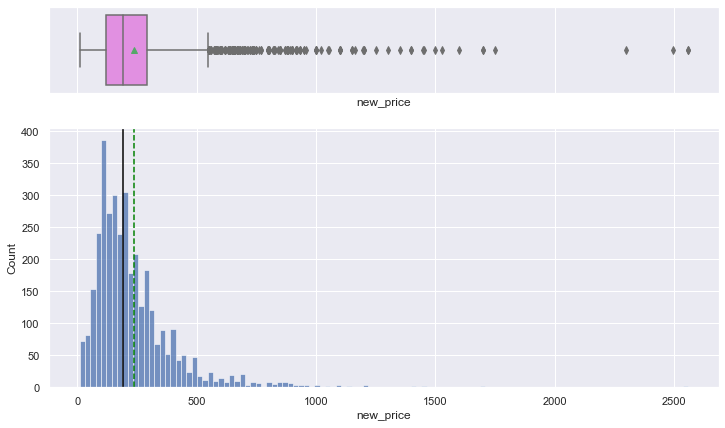

In [202]:
histogram_boxplot(data, "new_price")

#### Observations:
- The distribution is right skewed.
- The mean new price is around 200 Euros.
- There are 3 extreme outliers where the new_price of a phone is more than 2000 Euros.

#### used_price

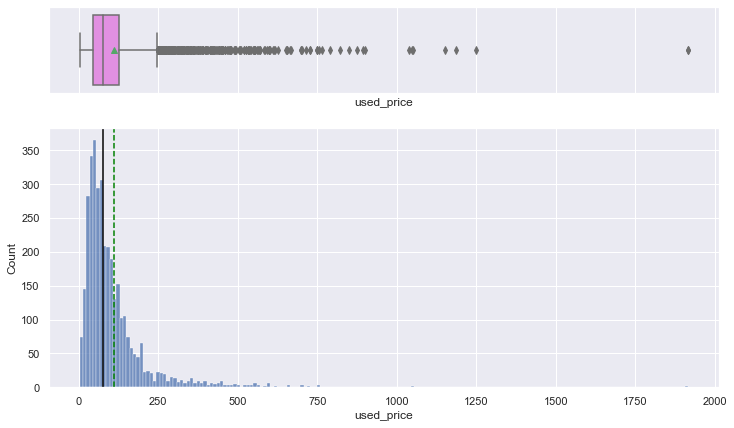

In [203]:
histogram_boxplot(data, "used_price")

#### Observations:
- The distribution is right skewed.
- The mean used price is around 100 Euros.
- There is 1 extreme outlier where the used price of the phone is greater than 1750 Euros.
- Question 1 - What does the distribution of used phone prices look like? - Its highly skewed to the right.

### Bivariate Analysis

#### ram vs brand_name

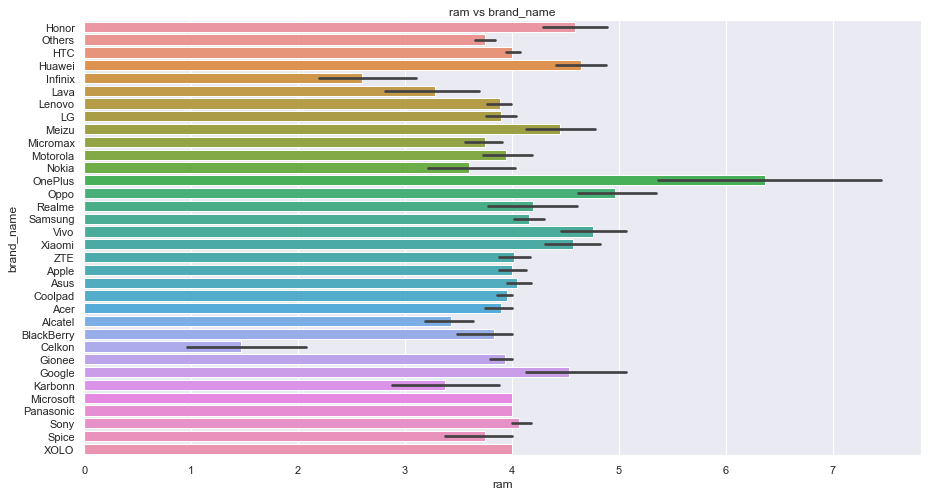

In [204]:
plt.figure(figsize=(15,8))
sns.barplot(data['ram'], data['brand_name'])
plt.title('ram vs brand_name')
plt.show()

#### Observations:
- Question 3 - The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand? - The amount of RAM is the highest for OnePlus at about 6.3GB followed by Oppo (~5GB) and Vivo (~4.7GB). On the average most phones have about 4GB. Celkon has the lowest ram of 1.5GB.

#### battery vs weight

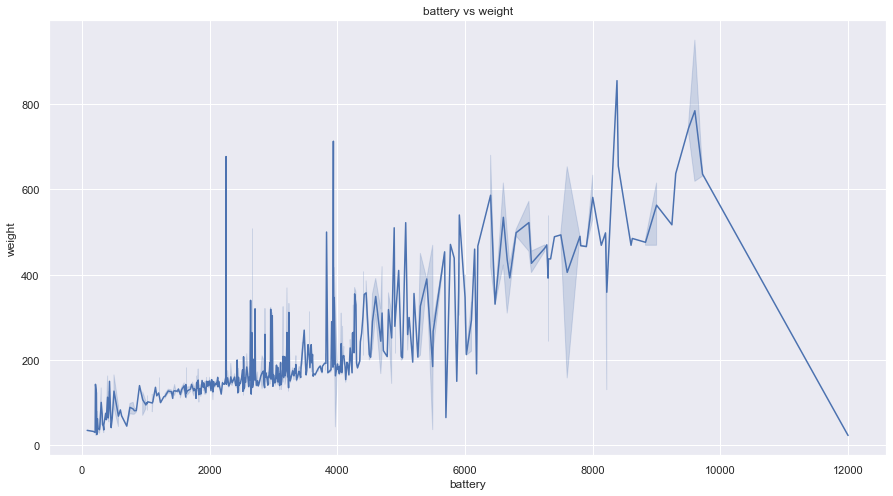

In [205]:
plt.figure(figsize=(15,8))
sns.lineplot(data['battery'], data['weight'])
plt.title('battery vs weight')
plt.show()

#### Observations:
- Question 4 - A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)? - The weight seems to increase as the battery size increases until battery size of about 9800 mAh after which the weight sharply drops, with a 12000 mAh battery phone weighing as low as ~20 grams which could possibly be an outlier.  

#### brand_name vs selfie_camera_mp

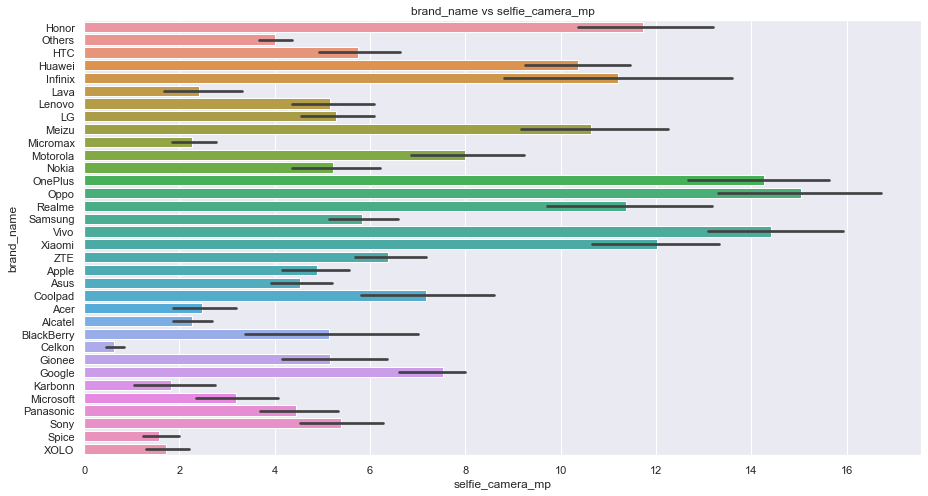

In [206]:
plt.figure(figsize=(15,8))
sns.barplot(data['selfie_camera_mp'], data['brand_name'])
plt.title('brand_name vs selfie_camera_mp')
plt.show()

#### Observations:
- Question 6 - Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands? - There are a number of budget phones offering greater than 8MP with the greatest being Vivo (~14.3MP), followed by OnePlus (~14.2MP) and other phones are within 8MP to 12MP range. 

### Multivariate analysis

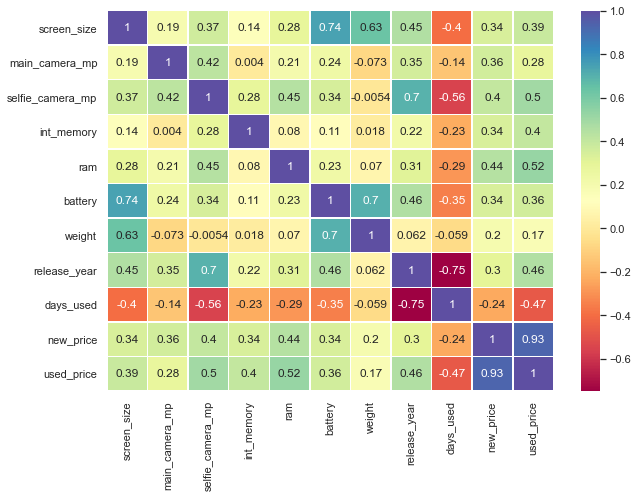

In [207]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(), cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

#### Observations:
- Question 7 - Which attributes are highly correlated with the used phone price? 
- new_price (price of a new phone of the same model) is highly positively correlated (0.93) with used phone price. 
- ram (0.52), selfie_camera_mp (0.5) and release_year (0.46) are also positively correlated with the used phone price to a certain extent. 
- days_used is negatively correlated (-0.47) with used phone price. As the number of days used increases, the used phone price decreases. 

**Let's look at the graphs of a few variables that are correlated with *used_price*.**

#### used_price vs new_price vs release_year

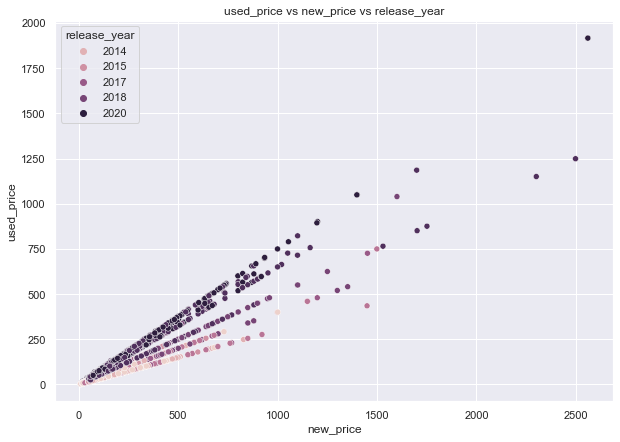

In [208]:
# plotting a scatterplot of used_price vs new_price vs release_year
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="new_price", hue="release_year", data=data)
plt.title('used_price vs new_price vs release_year')
plt.show()

#### Observations:
- As seen from the high correlation value from the heatmap, as the new phone price increases, the used phone price also increases and it is increasing over the years.

#### used_price vs selfie_camera_mp vs ram

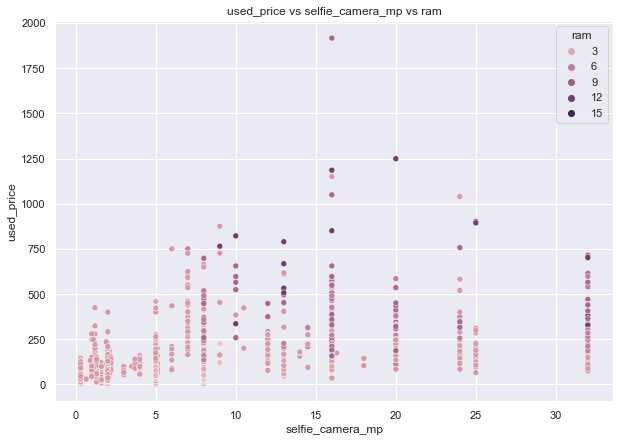

In [209]:
# plotting a scatterplot of used_price vs selfie_camera_mp vs ram
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="selfie_camera_mp", hue="ram", data=data)
plt.title ('used_price vs selfie_camera_mp vs ram')
plt.show()

#### Observations:
- We do see that generally as RAM increases, the price of used phone increases as well. 
- There doesnt seem to be much relationship between selfie camera mp and used phone price.


#### used_price vs days_used

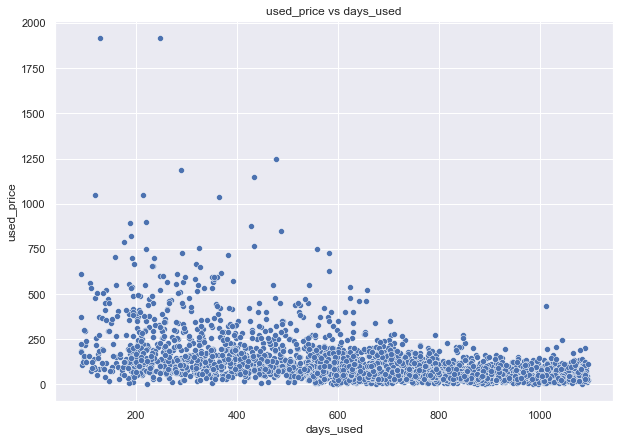

In [210]:
# plotting a scatterplot of used_price vs days_used
plt.figure(figsize=(10, 7))
sns.scatterplot(y="used_price", x="days_used", data=data)
plt.title('used_price vs days_used')
plt.show()

#### Observations:
- We can see that when the number of days used is lesser, the price of a used phone is generally higher than if it was used for a longer period of time. 
- After about 700 days, no matter how long the number of days used, the price seems to be constant.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [211]:
# checking for missing values
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

**Let's fix the missing values.**

- For the predictor variables, we will replace the missing values in each column with its median as they are all skewed.

In [212]:
# let's create a copy of the data to avoid any changes to original data
dfcopy = data.copy()

In [213]:
# Filling the missing values in the numeric columns with the median 
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = dfcopy.select_dtypes(include=np.number).columns.tolist()
dfcopy[numeric_columns] = dfcopy[numeric_columns].apply(medianFiller, axis=0)

In [214]:
# checking the number of missing values
dfcopy.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

**There are no missing values now.**

### Duplicate value check

In [215]:
dfcopy.duplicated().sum()

0

**There are no duplicated values.**

### Skewness check

In [216]:
dfcopy.skew(axis = 0, skipna = True)

screen_size         0.858232
main_camera_mp      0.786795
selfie_camera_mp    1.824195
int_memory          5.753263
ram                 1.736375
battery             1.170759
weight              3.147066
release_year        0.319971
days_used          -0.341654
new_price           3.738930
used_price          4.749091
dtype: float64

### Log transformation
Some features are very skewed and will likely behave better on the log scale.

We will transform int_memory, weight, new_price and used_price.

In [217]:
# let's create a copy of the data to avoid any changes to original data
dfc = dfcopy.copy()

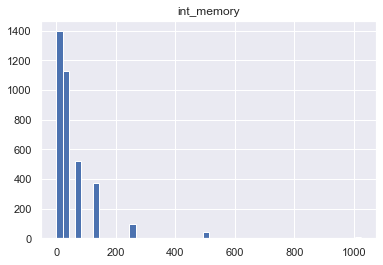

0


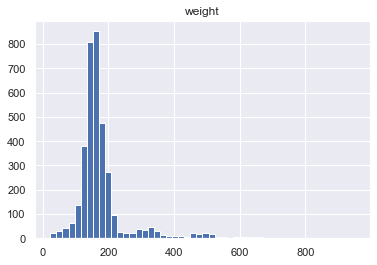

0


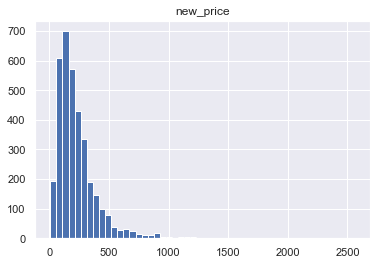

0


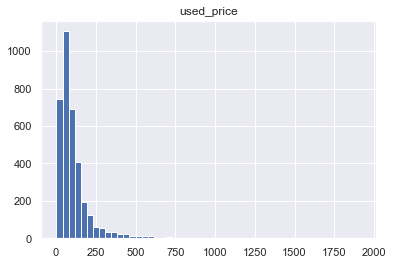

0


In [218]:
# plotting histograms of the variables that we are going to do log transformation on
cols_to_log = ['int_memory', 'weight', 'new_price', 'used_price']
for colname in cols_to_log:
    plt.hist(dfcopy[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(dfcopy[colname] <= 0))

All are positive values so we can directly take the log of these numbers.

In [219]:
# Doing log transformation for the 4 variables and dropping the original columns
for colname in cols_to_log:
    dfc[colname + '_log'] = np.log(dfc[colname])
dfc.drop(cols_to_log, axis=1, inplace=True)

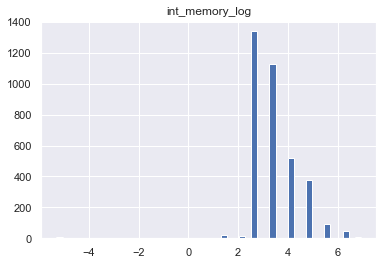

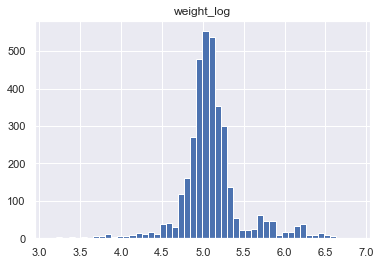

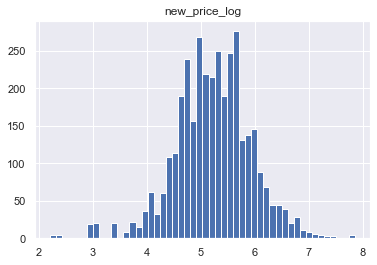

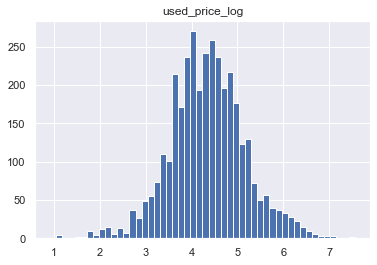

In [220]:
# plotting histograms for the new log transformed variables
log_cols = ['int_memory_log', 'weight_log', 'new_price_log', 'used_price_log']
for colname in log_cols:
    plt.hist(dfc[colname], bins=50)
    plt.title(colname)
    plt.show()

#### Observations:
- The log transformation has removed the skewness and helped the distributions to be closer to a normal distribution for weight, new_price and used_price. 
- However, for int_memory, it seems the outliers caused the log-transformed distribution to still be a bit skewed, but it is closer to normal than the original distribution.

### Outlier treatment

* Lets check the boxplots of the continuous variables - screen_size and weight.

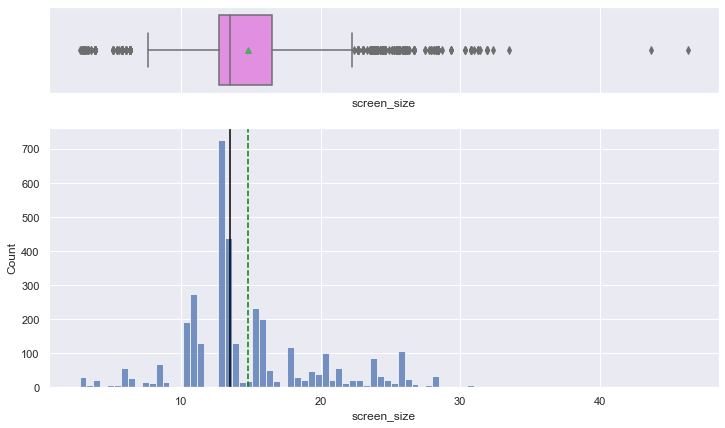

In [221]:
histogram_boxplot(dfc, "screen_size")

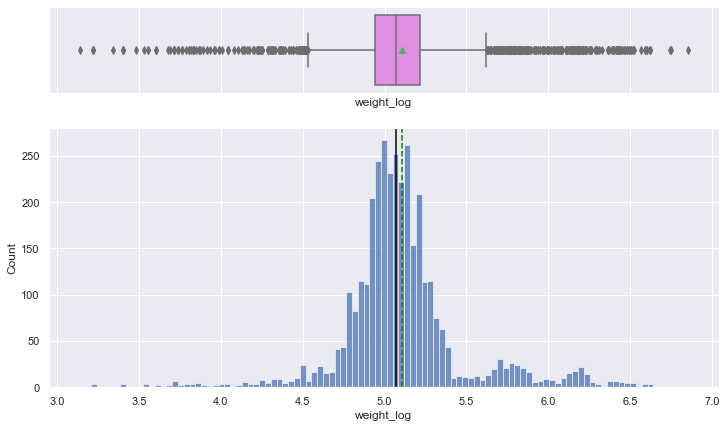

In [222]:
histogram_boxplot(dfc, "weight_log")

#### Observations:
- There seems to be 2 extreme outliers in screen_size so we will just remove them.
- There doesnt seem to be any extreme outliers in weight so we wont be doing any outliers treatment for weight.

In [223]:
# finding the 2 extreme outliers in screen_size
print (dfc[dfc['screen_size'] > 40])

     brand_name       os  screen_size   4g  5g  main_camera_mp  \
387     Samsung  Android        43.66  yes  no            12.0   
2562    Samsung  Android        46.36  yes  no             2.1   

      selfie_camera_mp  ram  battery  release_year  days_used  int_memory_log  \
387                5.0  3.0  12000.0          2019        266        4.158883   
2562               5.0  4.0   5700.0          2015        627        3.465736   

      weight_log  new_price_log  used_price_log  
387     3.135494       6.491436        6.132487  
2562    4.174387       6.461265        5.544122  


**One thing to note is that index 2562 also has a battery energy capacity of 12000 mAh which we identified earlier in our bivariate analysis as a possible outlier as its weight was extremely low at ~20 grams. So its a good thing we are removing it now as it is a outlier with respect to multiple variables.**

In [224]:
# dropping the 2 extreme outlying indexes
dfc2 = dfc.drop([dfc.index[387] , dfc.index[2562]])

**Now lets take a look at the boxplots to see if the outliers are treated or not**

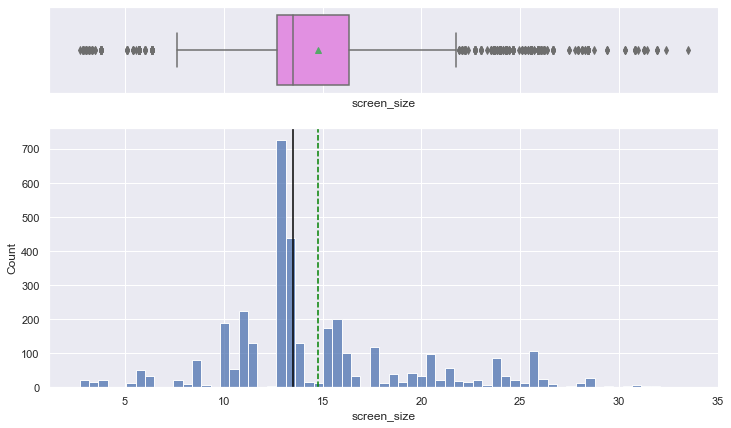

In [225]:
histogram_boxplot(dfc2, "screen_size")

#### Observations:
- We can notice that the two extreme outliers are removed.

**Let's convert the *object* type columns to *category* type**

In [226]:
dfc2["brand_name"] = dfc2["brand_name"].astype("category")
dfc2["os"] = dfc2["os"].astype("category")
dfc2["4g"] = dfc2["4g"].astype("category")
dfc2["5g"] = dfc2["5g"].astype("category")

## EDA

- It is a good idea to explore the data once again after manipulating it.

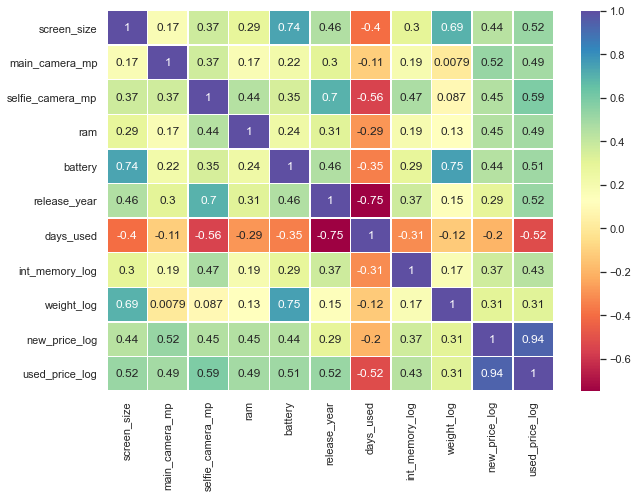

In [227]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(dfc2.corr(), cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

#### Observations:

- new_price (price of a new phone of the same model) is still highly positively correlated (0.94) with used phone price. 
- The correlation values of all other variables with used phone price have risen now except for ram which has dropped slighty from 0.52 to 0.49.  
- days_used is still negatively correlated (-0.52) with used phone price. 

## Building a Linear Regression model

1. We want to predict the price of a used phone.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

#### First lets define the variables

In [228]:
# defining X and y variables
X = dfc2.drop(["used_price_log"], axis=1)
y = dfc2["used_price_log"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        23.97  yes   no            13.0   
1      Honor  Android        28.10  yes  yes            13.0   
2      Honor  Android        24.29  yes  yes            13.0   
3      Honor  Android        26.04  yes  yes            13.0   
4      Honor  Android        15.72  yes   no            13.0   

   selfie_camera_mp  ram  battery  release_year  days_used  int_memory_log  \
0               5.0  3.0   3020.0          2020        127        4.158883   
1              16.0  8.0   4300.0          2020        325        4.852030   
2               8.0  8.0   4200.0          2020        162        4.852030   
3               8.0  6.0   7250.0          2020        345        4.158883   
4               8.0  3.0   5000.0          2020        293        4.158883   

   weight_log  new_price_log  
0    4.983607       4.715100  
1    5.361292       5.519018  
2    5.361292       5.884631  
3    6.173786       5.

#### Now lets encode the categorical variables

In [229]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,int_memory_log,weight_log,new_price_log,...,brand_name_Xiaomi,brand_name_ZTE,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
0,23.97,13.0,5.0,3.0,3020.0,2020,127,4.158883,4.983607,4.715100,...,0,0,1,0,0,0,0,1,1,0
1,28.10,13.0,16.0,8.0,4300.0,2020,325,4.852030,5.361292,5.519018,...,0,0,1,0,0,0,0,1,0,1
2,24.29,13.0,8.0,8.0,4200.0,2020,162,4.852030,5.361292,5.884631,...,0,0,1,0,0,0,0,1,0,1
3,26.04,13.0,8.0,6.0,7250.0,2020,345,4.158883,6.173786,5.630961,...,0,0,1,0,0,0,0,1,0,1
4,15.72,13.0,8.0,3.0,5000.0,2020,293,4.158883,5.220356,4.947837,...,0,0,1,0,0,0,0,1,1,0


We will drop one level in each categorical variable as it helps deal with multicollinearity issues.

In [230]:
X = X.drop(["brand_name_Others"], axis=1)

In [231]:
X = X.drop(["os_Others"], axis=1)

In [232]:
X = X.drop(["4g_no"], axis=1)

In [233]:
X = X.drop(["5g_no"], axis=1)

In [234]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3570
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3569 non-null   float64
 1   main_camera_mp         3569 non-null   float64
 2   selfie_camera_mp       3569 non-null   float64
 3   ram                    3569 non-null   float64
 4   battery                3569 non-null   float64
 5   release_year           3569 non-null   int64  
 6   days_used              3569 non-null   int64  
 7   int_memory_log         3569 non-null   float64
 8   weight_log             3569 non-null   float64
 9   new_price_log          3569 non-null   float64
 10  brand_name_Acer        3569 non-null   uint8  
 11  brand_name_Alcatel     3569 non-null   uint8  
 12  brand_name_Apple       3569 non-null   uint8  
 13  brand_name_Asus        3569 non-null   uint8  
 14  brand_name_BlackBerry  3569 non-null   uint8  
 15  bran

**We can see that one level in each categorical variable is dropped.**

#### Next, we will split the data in 70:30 ratio

In [235]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [236]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2498
Number of rows in test data = 1071


In [237]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

**Let's check the coefficients and intercept of the model.**

In [238]:
coef_dfcopy = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_dfcopy

,Coefficients
screen_size,7.554765e-04
main_camera_mp,3.263410e-04
selfie_camera_mp,5.135594e-04
ram,6.236020e-04
battery,-3.924460e-07
release_year,3.727758e-03
days_used,-1.104981e-03
int_memory_log,6.066796e-03
weight_log,-7.724740e-04
new_price_log,9.931343e-01


#### Observations

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

## Model performance evaluation

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [239]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [240]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.083232,0.069221,0.990057,0.989862,1.706044


In [241]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.081696,0.069591,0.990163,0.989701,1.69759


**Observations**

- The training $R^2$ is ~99%, indicating that the model explains about 99% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAPE on the test set suggests we can predict within ~1.70% of the price of a used phone.

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [242]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train_1 = sm.add_constant(x_train)
# adding constant to the test data
x_test_1 = sm.add_constant(x_test)

# building a linear regression model using statsmodels
olsmod0 = sm.OLS(y_train, x_train_1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5080.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:02:38   Log-Likelihood:                 2665.8
No. Observations:                2498   AIC:                            -5234.
Df Residuals:                    2449   BIC:                            -4948.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.64

**Observations**

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### 1 TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [244]:
checking_vif(x_train_1)

,feature,VIF
0,const,3.497531e+06
1,screen_size,3.439089e+00
2,main_camera_mp,2.077667e+00
3,selfie_camera_mp,2.893327e+00
4,ram,1.797450e+00
5,battery,3.863620e+00
6,release_year,4.514759e+00
7,days_used,2.575851e+00
8,int_memory_log,1.558629e+00
9,weight_log,3.726774e+00


* *brand_name_Apple* and *os_iOS* have a VIF score of much greater than 5.
* Clearly these 2 variables are correlated with each other.
* This does seem to make intuitive sense because Apple phones run on iOS operating system.
* **However, since the VIF values for dummy variables can be ignored, we can assume that the above predictors have no multicollinearity and the assumption is satisfied.**

As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.
- Many predictor variables have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    1. Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    2. Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest        p-value.
    3. Repeat the above two steps till there are no columns with p-value > 0.05.


In [245]:
# initial list of columns
cols = x_train_1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train_1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'release_year', 'days_used', 'int_memory_log', 'new_price_log', '5g_yes']


In [246]:
#defining new x train and x test with the selected features
x_train_2 = x_train_1[selected_features]
x_test_2 = x_test_1[selected_features]

In [247]:
# new linear regression model using statsmodels
olsmod2 = sm.OLS(y_train, x_train_2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.894e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:02:51   Log-Likelihood:                 2648.6
No. Observations:                2498   AIC:                            -5285.
Df Residuals:                    2492   BIC:                            -5250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.3799      2.300     -3.

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train2* as the final ones and *olsmod2* as final model.**

**Observations**

* Adjusted R-squared is 0.99, i.e., our model is able to explain ~99% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was also 0.99. This shows that the variables we dropped were not affecting the model.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### 2 & 3 TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [248]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head() # returns the first 5 rows

,Actual Values,Fitted Values,Residuals
3110,3.288775,3.340955,-0.052180
2191,3.465111,3.510036,-0.044925
1044,6.368307,6.301102,0.067206
1457,4.518413,4.599730,-0.081316
1489,2.952303,2.919778,0.032525


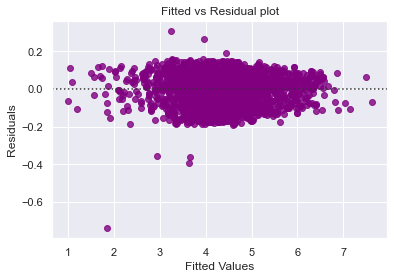

In [249]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple"
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### 4 TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

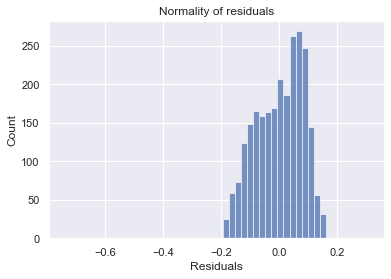

In [250]:
# plotting a histogram of the residuals
sns.histplot(data=df_pred, x="Residuals", bins=50)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals is close to a bell shape.
- Let's check the Q-Q plot.

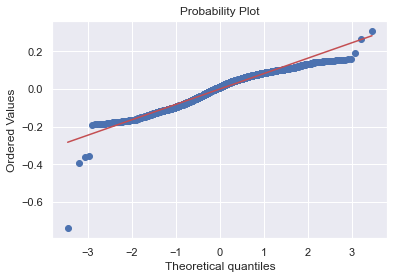

In [251]:
import pylab
import scipy.stats as stats

# plotting Q-Q plot 
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [252]:
# performing the Shapiro-Wilk test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9591538906097412, pvalue=6.071729267208372e-26)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### 5 TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [253]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# performing the goldfeldquandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train_2)
lzip(name, test)

[('F statistic', 0.9060516832237031), ('p-value', 0.9589357749206909)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the **prediction part**.

In [254]:
# predictions on the test set
pred = olsmod2.predict(x_test_2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1336,4.902902,5.008770
3152,3.942746,3.788531
351,5.814399,5.746792
561,2.607861,2.515173
855,3.784871,3.718789
3021,3.949704,3.974276
1033,3.665611,3.587128
219,3.693369,3.614421
877,5.048188,5.131593
1962,3.926123,3.825529


- We can observe here that the actual and predicted values are mostly comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

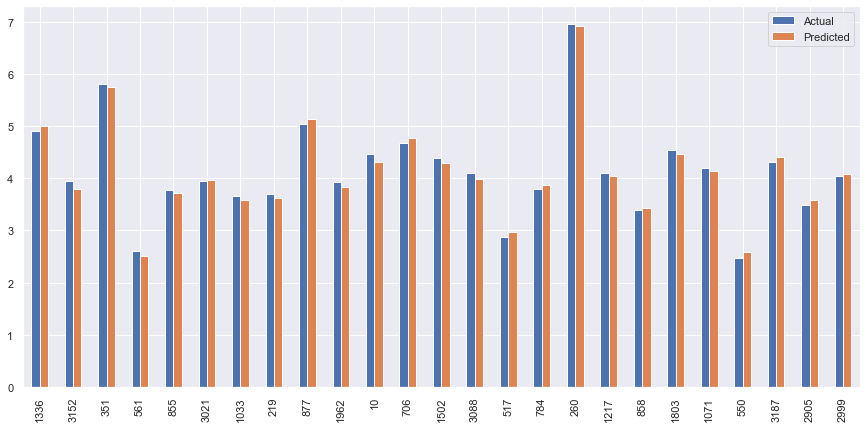

In [255]:
# plotting a barplot of actual vs predicted
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [256]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train_2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.083807,0.069992,0.989919,0.989895,1.725064


In [257]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test_2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.081617,0.069699,0.990182,0.990127,1.700849


* The model is able to explain ~99% of the variation in the data, which is very good.

* The train and test R-squared, MAE and RMSE are comparable, and the train and test RMSE and MAE are low. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within ~1.7% of the price of a used phone. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [258]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.083232,0.083807
MAE,0.069221,0.069992
R-squared,0.990057,0.989919
Adj. R-squared,0.989862,0.989895
MAPE,1.706044,1.725064


In [259]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.081696,0.081617
MAE,0.069591,0.069699
R-squared,0.990163,0.990182
Adj. R-squared,0.989701,0.990127
MAPE,1.697590,1.700849


#### Observations
- The performance of the two models are close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

## Final Model Summary

In [260]:
# final linear regression model using statsmodels
olsmodel_final = sm.OLS(y_train, x_train_2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.894e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:03:26   Log-Likelihood:                 2648.6
No. Observations:                2498   AIC:                            -5285.
Df Residuals:                    2492   BIC:                            -5250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.3799      2.300     -3.

## Actionable Insights and Recommendations

## Insights

Key Takeaway for business 

1. Factors that significantly influence the price of a used phone in order of significance: 
    - Price of a new phone of the same model
    - Presence of 5g
    - Amount of int memory
    - Release year
    
   As these factors increase, the price of a used phone also increases, as indicated by their positive coefficients.
   

2. As the number of days used (negative coefficient) increases, the price of a used phone decreases. 

## Recommendations

1. Try not to get phones that were either used for a long period of time (beyond 700 days) or released much earlier as they would be selling for a lower price.

2. Instead try to get and promote selling of used/refurbished phones that has comparable highly priced new phones, 5g and high amount of internal memory.

3. Though this model was simple to implement and easy to interpret the outputs coefficient to improve our business, we have to keep in mind that the model has a lot of statistical assumptions which are not always true for real-world data. This data collection and model building has to be a constant process so that we can keep improving our business. 
